# Exploratory Data Analysis of Chicago Crime Dataset

This is one of Data Analysis Process or approach that aid in describing or understanding data thoroughly in order to discover patterns in the dataset.


We're going to analyze the dataset using the flowing workflow:
1. Understand the Problem & Data

1. Data Preprocessing (Data Wrangling)

1. Features Engineering

1. Analyze & Visualize the Data

1. Develop Data-driven Insights


In [1]:
# Imorting the necessary library

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset
data = pd.read_csv(r"/content/crime_data_chicago.csv", low_memory=False)

## Understanding the Problem & Data

This is the first case that must be settled. There are some key questions that should be answered here:
- What exactly am i looking for inside the data? What type of data am i working with (Geospatial, Time-series, Financial etc)?
- What are my expectations? Understand which specific outcomes you are trying to impact.
- Who is this data for? Who are the key users (General public, Analyst, Managers).
- What and what motivates them? What would i want to communicate to the audience? Then let the analysis fits into the bigger picture.

In [3]:
# Taking a look at the first view of the dataset
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
data.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2278721,2278721,10716043,HZ474139,10/14/2016 02:35:00 PM,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,...,42.0,8.0,08A,1175423.0,1904617.0,2016,02/10/2018 03:50:01 PM,41.893647,-87.631177,"(41.893646656, -87.631177143)"
2278722,2278722,1740109,G546340,09/11/2001 10:20:00 PM,052XX W LAKE ST,0460,BATTERY,SIMPLE,RESIDENCE,False,...,NaN,NaN,08B,1141137.0,1902008.0,2001,08/17/2015 03:03:40 PM,41.887188,-87.757163,"(41.887188151, -87.757163155)"
2278723,2278723,4737434,HM342705,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,...,4.0,38.0,08A,1181989.0,1878827.0,2006,02/28/2018 03:56:25 PM,41.822727,-87.607863,"(41.82272748, -87.607863136)"
2278724,2278724,11122832,JA476827,10/18/2017 10:30:00 PM,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,...,42.0,8.0,26,1174469.0,1904732.0,2017,02/10/2018 03:50:01 PM,41.893984,-87.634677,"(41.893983593, -87.634677382)"
2278725,2278725,3409804,HK420105,06/09/2004 08:19:28 PM,016XX N ROCKWELL ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,1.0,24.0,18,1158782.0,1910845.0,2004,02/28/2018 03:56:25 PM,41.911094,-87.692123,"(41.91109424, -87.692122762)"


In [5]:
# How many data record do i have (rows & columns)
data.shape

(2278726, 23)

*This is quite a large dataset of 23 features (columns) over 2 million plus records (rows)*

In [6]:
# Taking a closer look at the Features
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

*The first thing to see here is that Unnamed Column is same as the index so, it serve no purpose. I'll be dropping to use ID column as my index*

In [7]:
# Dropping the Unnamed Column
data.drop(columns=['Unnamed: 0'], inplace=True, axis=1)

In [8]:
data.columns # 22 Features to work with now

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

*There are gaps in some column names, let's adjust it a little*

In [9]:
# Let's the remove the white space on the headings
data.rename(columns={
    "Case Number": "Case_Number",
    "Primary Type": "Primary_Type",
    "Location Description": "Location_Description",
    "Community Area": "Community_Area",
    "FBI Code": "FBI_Code",
    "X Coordinate": "X_Coordinate",
    "Y Coordinate": "Y_Coordinate",
    "Updated On": "Updated_On",
    }, inplace=True)

data.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [10]:
# To ascertain the general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case_Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary_Type          object 
 6   Description           object 
 7   Location_Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community_Area        float64
 14  FBI_Code              object 
 15  X_Coordinate          float64
 16  Y_Coordinate          float64
 17  Year                  int64  
 18  Updated_On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

*The features data types look okay at a glance exept Year, which should be Date. You can treat it later.*

## Data Preprocessing (Wrangling)

This is about creating clean, quality data for analysis which involves **Quality Assurance (QA), and Basic Profiling**

<u>Quality Assurance</u> is finding and tackling anything that will affect/skew the analysis like:

a. Duplicates

b. Empty /Null values

c. The right data type

d. String Trimming / Abbreviations

e. Outliers


<u>Data Profiling</u> Using metrics to profile the dataset (Counts, Mean, Median etc). This is for better understanding of our data to know the target (response) variable & feature variables.

In [11]:
# Let's chack for duplicates
data.duplicated().sum()

0

*We found zero duplicate*

In [12]:
# For the statistical anaysis of the numerical features, we use describe
data.describe()

,ID,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
count,2.278726e+06,2.278726e+06,2.278714e+06,2.094031e+06,2.094459e+06,2.254741e+06,2.254741e+06,2.278726e+06,2.254741e+06,2.254741e+06
mean,6.882068e+06,1.186442e+03,1.129072e+01,2.272764e+01,3.752140e+01,1.164569e+06,1.885747e+06,2.009638e+03,4.184209e+01,-8.767161e+01
std,3.419168e+06,7.026836e+02,6.946692e+00,1.383464e+01,2.153282e+01,1.673955e+04,3.209855e+04,6.019724e+00,8.830434e-02,6.073538e-02
min,6.370000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.716076e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152948e+06,1.859053e+06,2.004000e+03,4.176866e+01,-8.771379e+01
50%,6.885990e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166060e+06,1.890673e+06,2.009000e+03,4.185578e+01,-8.766597e+01
75%,9.887568e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909219e+06,2.014000e+03,4.190668e+01,-8.762823e+01
max,1.278199e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01


In [13]:
# For the statistical anaysis of the categorical variables to be included, we use describe
data.describe(include='all')

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
count,2.278726e+06,2278725,2278726,2278726,2278726,2278726,2278726,2275849,2278726,2278726,...,2.094031e+06,2.094459e+06,2278726,2.254741e+06,2.254741e+06,2.278726e+06,2278726,2.254741e+06,2.254741e+06,2254741
unique,NaN,2278678,1343546,54347,392,35,515,198,2,2,...,NaN,NaN,26,NaN,NaN,NaN,4461,NaN,NaN,545376
top,NaN,HK172551,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,3,81,4878,184891,479375,268418,590957,1675252,1965311,...,NaN,NaN,479375,NaN,NaN,NaN,836558,NaN,NaN,4227
mean,6.882068e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.272764e+01,3.752140e+01,NaN,1.164569e+06,1.885747e+06,2.009638e+03,NaN,4.184209e+01,-8.767161e+01,NaN
std,3.419168e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.383464e+01,2.153282e+01,NaN,1.673955e+04,3.209855e+04,6.019724e+00,NaN,8.830434e-02,6.073538e-02,NaN
min,6.370000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.716076e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152948e+06,1.859053e+06,2.004000e+03,NaN,4.176866e+01,-8.771379e+01,NaN
50%,6.885990e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166060e+06,1.890673e+06,2.009000e+03,NaN,4.185578e+01,-8.766597e+01,NaN
75%,9.887568e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176365e+06,1.909219e+06,2.014000e+03,NaN,4.190668e+01,-8.762823e+01,NaN


*At a glance, we can see that there are **35 unique categories of crime** Theft being the top type committed in Chicago city.*

In [14]:
# Checking for null values
data.isna().sum()

ID                           0
Case_Number                  1
Date                         0
Block                        0
IUCR                         0
Primary_Type                 0
Description                  0
Location_Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community_Area          184267
FBI_Code                     0
X_Coordinate             23985
Y_Coordinate             23985
Year                         0
Updated_On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [15]:
def missing_percentage(dataF):
    row, column = data.shape
    return data.isna().sum()/row * 100

In [16]:
def missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean().reset_index()
    missing_percentage.columns = ['Column', 'Missing Percentage']

    # Convert the proportion to percentage by multiplying by 100
    missing_percentage['Missing Percentage'] *= 100

    return missing_percentage

In [17]:
missing_value_percentage(data)

,Column,Missing Percentage
0,ID,0.000000
1,Case_Number,0.000044
2,Date,0.000000
3,Block,0.000000
4,IUCR,0.000000
5,Primary_Type,0.000000
6,Description,0.000000
7,Location_Description,0.126255
8,Arrest,0.000000
9,Domestic,0.000000


In [18]:
data.Location.head()

0    (41.739979622, -87.555120042)
1    (41.726922145, -87.599746995)
2    (41.994137622, -87.734959049)
3    (41.881217483, -87.730589961)
4    (41.874173691, -87.668082118)
Name: Location, dtype: object

In [19]:
# Using the mode to fill up the most common Location, then replace it with the current Location column
most_fq_loc = data.Location.mode()[0] # indexing the mode to get the value as it returns a series
data.Location = data.Location.fillna(most_fq_loc)

In [20]:
# I need to copy the dataset for future reference in case of some errors
data = data.copy()

In [21]:
# Dropping the some Column that we don't need for our analysis
data.drop(['Location_Description', 'Ward', 'Community_Area', 'X_Coordinate', 'Y_Coordinate', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [22]:
data.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Arrest', 'Domestic', 'Beat', 'District', 'FBI_Code',
       'Year', 'Updated_On', 'Location'],
      dtype='object')

*We'll be using this 15 coloumns. Others are important too but we found out that their level of importance is not high for our analysis.*

In [23]:
data.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Arrest,Domestic,Beat,District,FBI_Code,Year,Updated_On,Location
0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,False,False,423,4.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)"
1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,True,False,413,4.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)"
2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,True,False,1711,17.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)"
3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,False,False,1115,11.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)"
4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,False,False,1231,12.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)"


In [24]:
# Let's check again for missing data
data.isna().sum()

ID               0
Case_Number      1
Date             0
Block            0
IUCR             0
Primary_Type     0
Description      0
Arrest           0
Domestic         0
Beat             0
District        12
FBI_Code         0
Year             0
Updated_On       0
Location         0
dtype: int64

In [25]:
data.Year.unique()

array([2008, 2018, 2007, 2021, 2001, 2006, 2014, 2010, 2016, 2011, 2004,
       2012, 2015, 2003, 2002, 2017, 2013, 2020, 2022, 2019, 2005, 2009])

In [27]:
# Using the mode to fill up the remaining missing data on others

most_fq_case = data.Case_Number.mode()[0] # indexing the mode to get the value as it returns a series
data.Case_Number = data.Case_Number.fillna(most_fq_case)

most_fq_dis = data.District.mode()[0] # indexing the mode to get the value as it returns a series
data.District = data.District.fillna(most_fq_dis)

## Features Engineering


Here, <u>Date Profiling</u> becomes a part of the feature engineering in our analysis.


Just like we roughly guessed the important columns to consider earlier, here's where the thorough understanding of each column comes in. We need to know how one column relate to another which we will be used for our analysis.

Note also that, features engineering is <u>iterateable</u>. If the columns you have are not making sense, go back the full dataset and look for the ones that may make sense.

In [28]:
import numpy as np
import seaborn as sns

In [29]:
data.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Arrest,Domestic,Beat,District,FBI_Code,Year,Updated_On,Location
0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,False,False,423,4.0,14,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)"
1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,True,False,413,4.0,15,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)"
2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,True,False,1711,17.0,05,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)"
3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,False,False,1115,11.0,08A,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)"
4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,False,False,1231,12.0,04A,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)"


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            int64  
 1   Case_Number   object 
 2   Date          object 
 3   Block         object 
 4   IUCR          object 
 5   Primary_Type  object 
 6   Description   object 
 7   Arrest        bool   
 8   Domestic      bool   
 9   Beat          int64  
 10  District      float64
 11  FBI_Code      object 
 12  Year          int64  
 13  Updated_On    object 
 14  Location      object 
dtypes: bool(2), float64(1), int64(3), object(9)
memory usage: 230.4+ MB


In [ ]:
# Categorical features and their values
print("Primary_Type: \n", data["Primary_Type"].unique(),'\n')
print("Crime Description: \n", data['Description'].unique(),'\n')
print("Block: \n", data['Block'].unique(),'\n')
print("IUCR: \n", data['IUCR'].unique(),'\n')
print("FBI_Code: \n", data['FBI_Code'].unique(),'\n')
print("Case_Number: \n", data['Case_Number'].unique(),'\n')
print("Updated_On: \n", data['Updated_On'].unique(),'\n')
print("Date: \n", data['Date'].unique(),'\n')
print("Crime Location: \n",data["Location"].unique(),'\n')

In [32]:
#
from datetime import datetime

def export_month(dataM):
    data_column = pd.to_datetime(dataM, format = '%m/%d/%Y %I:%M:%S %p')
    month_name = data_column.dt.month_name()
    return month_name

def export_season(dataD):
    data_column = pd.to_datetime(dataD, format = '%m/%d/%Y %I:%M:%S %p')
    month_to_season = {1: "Winter", 2: "Winter", 3: "Spring", 4:"Spring", 5:"Spring", 6: 'Summer', 7: "Summer", 8: "Summer",
                      9:"Fall", 10: "Fall", 11: 'Fall', 12: 'Winter'}
    season_column = data_column.dt.month.map(month_to_season)
    return season_column

In [33]:
data['Month'] = export_month(data['Date'])

In [34]:
data['Season'] = export_season(data['Date'])

In [35]:
# Using aggregate to view Primary Crime Type closer
common_crime_per_month = data.groupby('Month')['Primary_Type'].value_counts()

most_common_crimetype_per_month = common_crime_per_month.idxmax()
monthly_crime_type_count = common_crime_per_month.max()
least_common_crimetype_per_month = common_crime_per_month.idxmin()
monthly_crime_type_count2 = common_crime_per_month.min()

print("Most common committed crime:", most_common_crimetype_per_month)
print("Number of most committed crime occurrences:",monthly_crime_type_count)
print("least common committed crime:",least_common_crimetype_per_month )
print("Number of least committed occurrences:",monthly_crime_type_count2)

Most common committed crime: ('July', 'THEFT')
Number of most committed crime occurrences: 47192
least common committed crime: ('April', 'NON-CRIMINAL')
Number of least committed occurrences: 1


In [36]:
# To check how the Primary Crime Type is distributed in numbers
data.Primary_Type.value_counts()

THEFT                                479375
BATTERY                              418651
CRIMINAL DAMAGE                      259962
NARCOTICS                            222861
ASSAULT                              147666
OTHER OFFENSE                        141627
BURGLARY                             125163
MOTOR VEHICLE THEFT                  105854
DECEPTIVE PRACTICE                    99352
ROBBERY                               85695
CRIMINAL TRESPASS                     63499
WEAPONS VIOLATION                     30211
PROSTITUTION                          20796
OFFENSE INVOLVING CHILDREN            16321
PUBLIC PEACE VIOLATION                15511
SEX OFFENSE                            8806
CRIM SEXUAL ASSAULT                    8363
INTERFERENCE WITH PUBLIC OFFICER       5494
LIQUOR LAW VIOLATION                   4470
GAMBLING                               4345
ARSON                                  3886
HOMICIDE                               3597
KIDNAPPING                      

In [37]:
# Aggregating Primary Crime Type with it's Description

agg_func_count = {'Description': ['count', 'nunique', 'size']}
data.groupby(['Primary_Type']).agg(agg_func_count)


Description                
                                        count nunique    size
Primary_Type                                                 
ARSON                                    3886       7    3886
ASSAULT                                147666      29  147666
BATTERY                                418651      54  418651
BURGLARY                               125163       4  125163
CONCEALED CARRY LICENSE VIOLATION         305       3     305
CRIM SEXUAL ASSAULT                      8363      12    8363
CRIMINAL DAMAGE                        259962       9  259962
CRIMINAL SEXUAL ASSAULT                  1591      12    1591
CRIMINAL TRESPASS                       63499       5   63499
DECEPTIVE PRACTICE                      99352      38   99352
GAMBLING                                 4345      18    4345
HOMICIDE                                 3597       3    3597
HUMAN TRAFFICKING                          32       2      32
INTERFERENCE WITH PUBLIC OFFICER         5494      13    5494
INTIMIDATION                             1397       5    1397
KIDNAPPING                               2172       8    2172
LIQUOR LAW VIOLATION                     4470       7    4470
MOTOR VEHICLE THEFT                    105854      19  105854
NARCOTICS                              222861      78  222861
NON - CRIMINAL                             12       1      12
NON-CRIMINAL                               48       6      48
NON-CRIMINAL (SUBJECT SPECIFIED)            2       1       2
OBSCENITY                                 224       4     224
OFFENSE INVOLVING CHILDREN              16321      24   16321
OTHER NARCOTIC VIOLATION                   31       1      31
OTHER OFFENSE                          141627      60  141627
PROSTITUTION                            20796      17   20796
PUBLIC INDECENCY                           58       1      58
PUBLIC PEACE VIOLATION                  15511      15   15511
RITUALISM                                  11       4      11
ROBBERY                                 85695      26   85695
SEX OFFENSE                              8806      23    8806
STALKING                                 1338       4    1338
THEFT                                  479375      18  479375
WEAPONS VIOLATION                       30211      27   30211

In [38]:
# Aggregating Primary Crime Type with it's Location

agg_func_count = {'Location': ['count', 'nunique']}
data.groupby(['Primary_Type']).agg(agg_func_count)

Location        
                                     count nunique
Primary_Type                                      
ARSON                                 3886    3764
ASSAULT                             147666   88782
BATTERY                             418651  184401
BURGLARY                            125163   94874
CONCEALED CARRY LICENSE VIOLATION      305     215
CRIM SEXUAL ASSAULT                   8363    7340
CRIMINAL DAMAGE                     259962  166739
CRIMINAL SEXUAL ASSAULT               1591    1289
CRIMINAL TRESPASS                    63499   32770
DECEPTIVE PRACTICE                   99352   55428
GAMBLING                              4345    3897
HOMICIDE                              3597    3495
HUMAN TRAFFICKING                       32      29
INTERFERENCE WITH PUBLIC OFFICER      5494    5084
INTIMIDATION                          1397    1266
KIDNAPPING                            2172    2059
LIQUOR LAW VIOLATION                  4470    3854
MOTOR VEHICLE THEFT                 105854   82716
NARCOTICS                           222861  112338
NON - CRIMINAL                          12      12
NON-CRIMINAL                            48      41
NON-CRIMINAL (SUBJECT SPECIFIED)         2       2
OBSCENITY                              224     212
OFFENSE INVOLVING CHILDREN           16321   13323
OTHER NARCOTIC VIOLATION                31      31
OTHER OFFENSE                       141627   94872
PROSTITUTION                         20796    9807
PUBLIC INDECENCY                        58      58
PUBLIC PEACE VIOLATION               15511   12487
RITUALISM                               11      11
ROBBERY                              85695   59679
SEX OFFENSE                           8806    7494
STALKING                              1338    1284
THEFT                               479375  203693
WEAPONS VIOLATION                    30211   26068

In [39]:
# Aggregating with Beat over Primary Crime Type By District

beat_group = data.groupby(['Primary_Type', 'District']).agg({'Beat': 'sum'})
beat_group.groupby(level=0).cumsum()

Beat
Primary_Type      District          
ARSON             1.0          10123
                  2.0          84452
                  3.0         142216
                  4.0         253615
                  5.0         348879
...                              ...
WEAPONS VIOLATION 19.0      23122036
                  20.0      23491736
                  22.0      25794994
                  24.0      26940675
                  25.0      31436092

[711 rows x 1 columns]

In [40]:
# Aggregating with Beat over Primary Crime Type By Description

beat_group = data.groupby(['Primary_Type', 'Description']).agg({'Beat': 'sum'})
beat_group.groupby(level=0).cumsum()

Beat
Primary_Type      Description                             
ARSON             AGGRAVATED                        670277
                  ATTEMPT ARSON                    1337823
                  BY EXPLOSIVE                     1391649
                  BY FIRE                          4612857
                  POS: CHEMICAL/DRY-ICE DEVICE     4626929
...                                                    ...
WEAPONS VIOLATION UNLAWFUL USE HANDGUN            27160995
                  UNLAWFUL USE OTHER DANG WEAPON  30358559
                  UNLAWFUL USE OTHER FIREARM      30588680
                  UNLAWFUL USE/SALE AIR RIFLE     31433665
                  USE OF METAL PIERCING BULLETS   31436092

[558 rows x 1 columns]

## Analyze & Visualize Data


**Context is Key here**. It is <u>context</u> that gives <u>numbers meaning</u>. Another highlight here is to use the correct charts & visuals that are suited for the type of data you're working with, the story you're communicating & the end user consuming the information.

If you don't know the full story about the data, add some filters for exploratory so that user can explore on their own, answer new questions & discover fresh insights. Do not prioritize variety over effectiveness, choose the right chart for the job.

<u>Clarity</u> always trumps <u>aesthetic</u>. Cut out anything that's not necessary - colors, backgroung images, 3Ds etc

<Axes: >

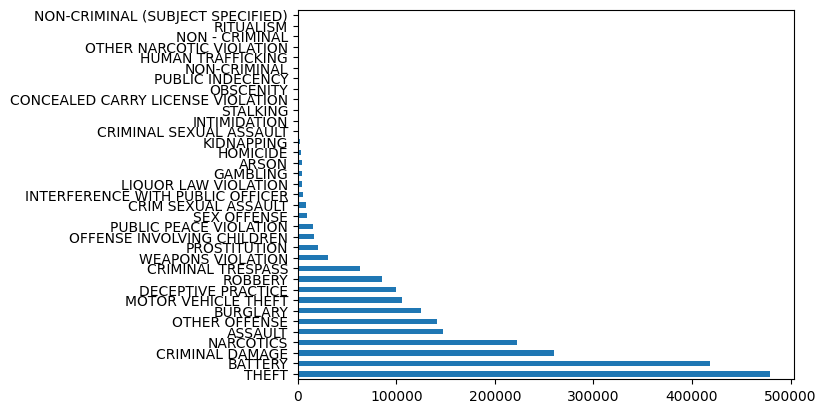

In [41]:
# Horizontal Bar chart to count of Primary Crime Type
data["Primary_Type"].value_counts().plot(kind="barh")

*We can easily see the highest being **THEFT** followed by Battery, Criminal Damage, Narcotics and others*

Text(0.5, 1.0, 'log(Primary_Type) vs Arrest')

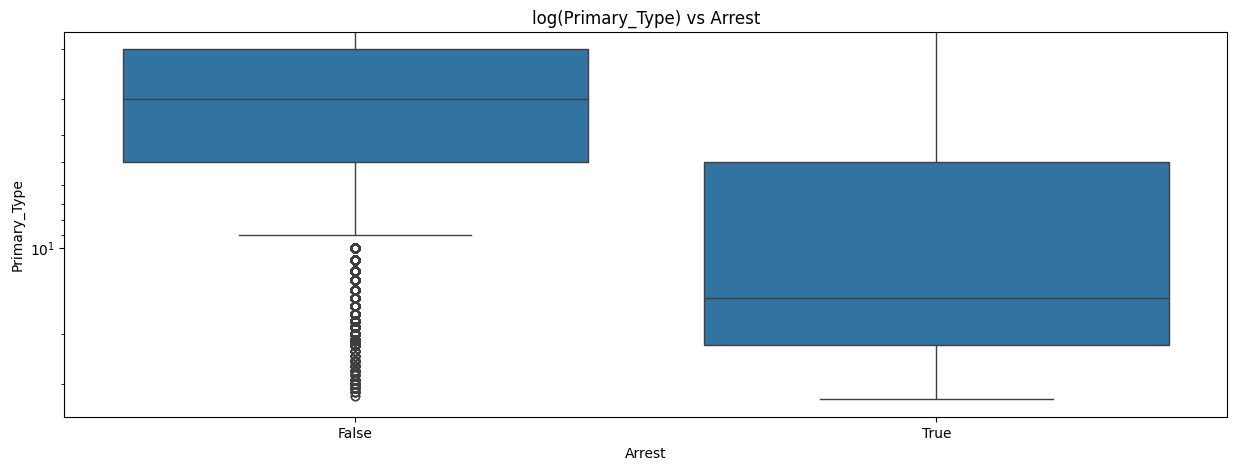

In [42]:
# To check how the number of Arrest affect the Primary Crime Type
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "Arrest", y = "Primary_Type", data = data, orient = 'v')
ax.set_xlabel("Arrest")
ax.set_ylabel("Primary_Type")
ax.set_yscale("log")
ax.set_title("log(Primary_Type) vs Arrest")

*There's so many variables that's affecting the output due to the size of the dataset but our analysis shows that The <u>True Arrest</u> falls within the **25% quantile** while the <u>False Arrest </u> congregated at the mean*

Text(0.5, 1.0, 'log(Primary_Type) vs Year')

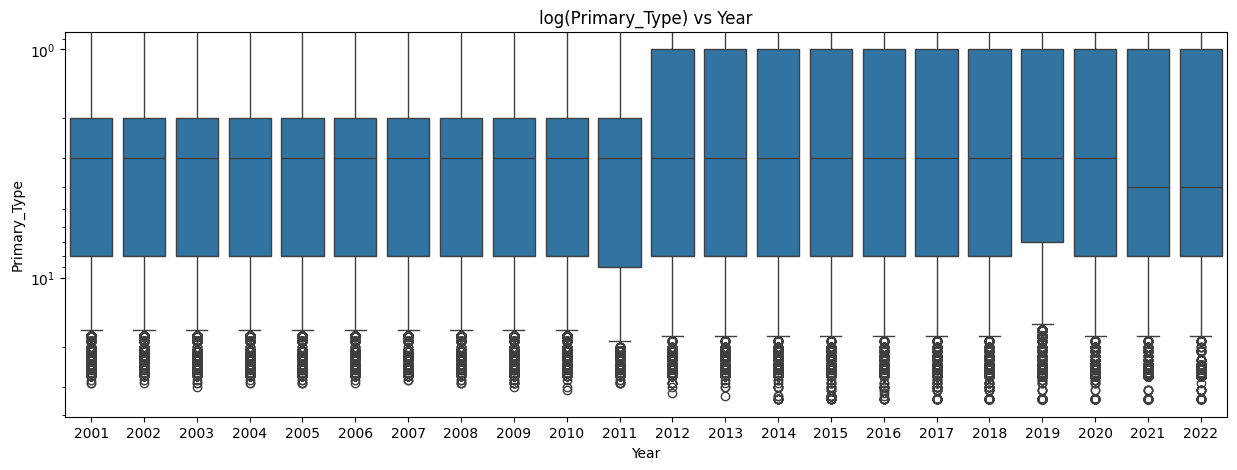

In [43]:
# To check Primary Crime Type verses Year
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "Year", y = "Primary_Type", data = data, orient = 'v')
ax.set_xlabel("Year")
ax.set_ylabel("Primary_Type")
ax.set_yscale("log")
ax.set_title("log(Primary_Type) vs Year")

*From **2001 to 2011**, there's a significant different as the Primary Crime Type was at **75% quantile** but from 2012, it started falling. Towards the last two years **(2021 & 2022)**, it was now at 25% quantile.*

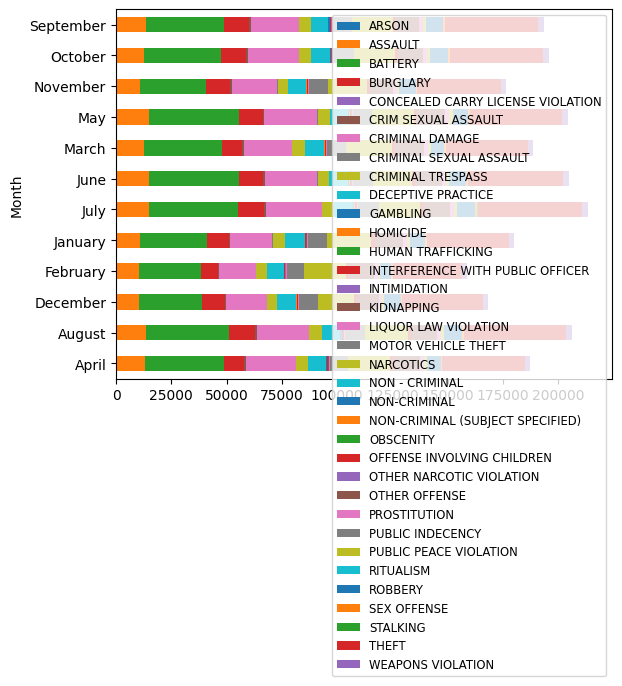

In [44]:
# graphical description of crime per month
common_crime_per_month = common_crime_per_month.unstack()
crime_month = common_crime_per_month.plot(kind='barh', stacked=True)
crime_month.legend(fontsize='small')

*The volume of the dataset is not permitting us to have much clarity but we can see vivdly that **July** is the month with the highest crime record.*

<ipython-input-45-4bad70e3895e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_trend = data.groupby('Primary_Type').sum()['District'].reset_index()


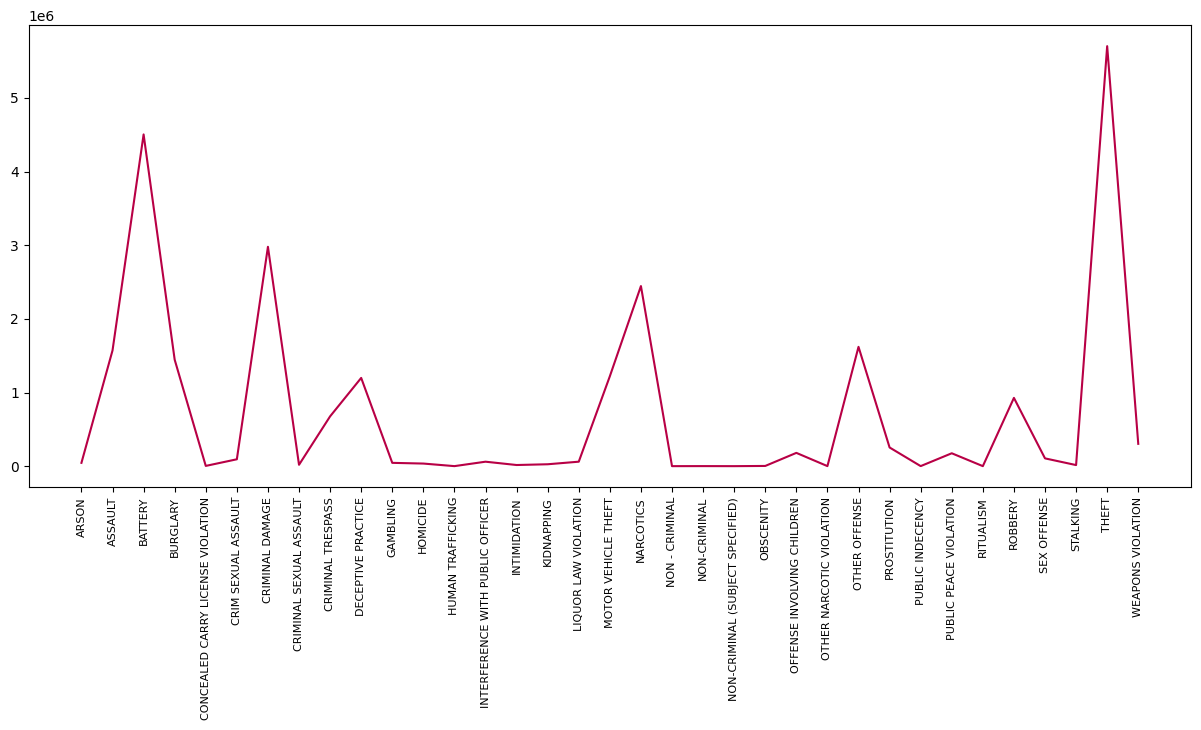

In [45]:
# Distribution of Primary Crime Type over District
crime_trend = data.groupby('Primary_Type').sum()['District'].reset_index()
crime_trend

plt.figure(figsize=(15,6))
plt.plot(crime_trend['Primary_Type'],crime_trend['District'], color = '#b80045')
plt.xticks(rotation = 'vertical', size=8)
plt.show()

*The highest Peak is on THEFT which occurred most in District 5*

<Axes: >

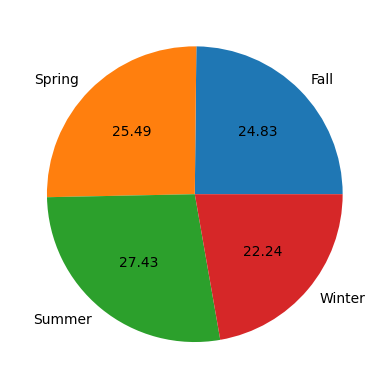

In [46]:
# Season Composition Breakdown - Season column component is broken down to ascertain the crime percentage

data.groupby('Season').size().plot(kind='pie', autopct='%.2f')

*Pie chart is basically used when you're accessing the components of a whole. So here, we were trying to evalute the <u>percentage of the Season components</u> which are: Summer, Spring, Winter & Fall.*

*One can easily see that **Summer** has the highest percentage crime.*

## Develop Data Driven Insights


Numbers, charts or graph doesn't inspire, it's the stories that inspire people.

Answer These Question:

- What are your findings from your analysis?

- What do you want your users to see?

Ensure that you tell a clear data-driven stories, designed to expose key insights and inspire stakeholders to act.

Remember, if your Insights doesn't inspire action or facilitate change, it has zero purpose.

<hr>

The Features that we used for the above analysis are:

- ID

- Case_Number

- Date

- Block

- IUCR

- Primary_Type

- Description

- Arrest

- Domestic

- Beat

- District

- FBI_Code

- Year

- Updated_On

- Location

<hr>

### Classifying The Data According To Type

One can easily see that **Primary Type** is the <u>Target (Response) variable</U>.

Then, ID, Beat & Year are **Discrete Numerical Values**

Case_Number, IUCR & FBI_Code are **Unordered Factor** under Discrete Categorical data.

District is **Continuous Numerical Value**

Date can be **Continuous or Discrete**

These being the major features that was used, there are some others that we didn't mention.

<hr>

### Data Driven Insights



The **Top Five** most committed crime on record in Chicago are:

- **Theft** with a total number of <u>479375</u>

- **Battery** with a total number of <u>418651</u>

- **Criminal Damage** with a total number of <u>259962</u>

- **Narcotics** with a total number of <u>222861</u>

- **Assault** with a total number of <u>147666</u>

And The least 5 crimes include:

- **Public Indecency** with a total number of <u>58</u>

- **Human Trafficking** with a total number of <u>32</u>

- **Other Narcotics Violence** with a total number of <u>31</u>

- **Non criminal** with a total number of <u>12</u>

- **Ritualism** with a total number of <u>11</u>

2. Surprisingly, Narcotics has the most unique values of **78** showing that if the dataset is to be analysed some more, there's tendency of it being the highest crime.

3. Aggregating the Primary Crimes Type some more, we found out that Description of the crime plays a big role in explaining how the crimes are categoried. Each crime types has many sub-types that one should look out for.

  The District, Location where they occurred and Beat were also in the major role of how crimes were been committed and most locations to look out for and avoid.

4. FBI_Code is the number that is used to recognise each crime. This is for ducating the citizens on how to see and avoid crimes.

5. Breaking the Date showed us that Most common crime is **'July'** on **'THEFT'** crime with <u>47192</u> Number of occurrences. The least being **'April'** on **'NON-CRIMINAL'** crime with just <u> 1</u> as the Number of occurrence.

  Further breaking on the Date showed us that the day Most crime was recorded is **'Friday'** on **'THEFT'** crime with <u>74028</u> Number of occurrences. The least being **'Monday'** on **'NON-CRIMINAL'** crime with just <u> 1</u> as the Number of occurrence.

  Then on the Season, **'Summer'** recorded the highest on **'THEFT'** crime with <u>74028</u> Number of occurrences. The least being **'Winter'** on **'Ritualism'** crime of <u> 2</u> as the Number of occurrence.


## Conclusion

In summary, there's so much to analyze & discover in this dataset. In fact it is oversampled due to the high volume dataset which is over 2 million plus. So, this analysis is not all there is to it as we're to make an error or two.

The overall experience was an eye opener to so many ways that we can view & walk with data as well as so many things that we can use data to achieve.